# EDA

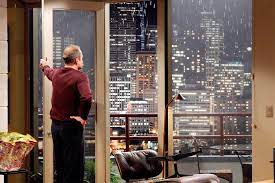

In [1]:
# Import needed packages
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import geopandas as gpd
import random
# Check the version using the show_versions() function
#sm.show_versions()



from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Import sales data
df_sales = pd.read_csv('data/df_sales.csv')
df_sales.head()

,date,price,house_id,id
0,2014-10-13,221900.000,7129300520,1
1,2014-12-09,538000.000,6414100192,2
2,2015-02-25,180000.000,5631500400,3
3,2014-12-09,604000.000,2487200875,4
4,2015-02-18,510000.000,1954400510,5


In [3]:
# Import houses' details data
df_details = pd.read_csv('data/df_details.csv')
df_details.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,1320.000,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000
2,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,1350.000,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000
3,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,1260.000,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000
4,1003000175,3.000,1.000,980.000,7606.000,1.000,0.000,0.000,3,7,980.000,0.000,1954,0.000,98188,47.436,-122.290,980.000,8125.000


In [4]:
print('Columns in sales data: ', df_sales.columns.to_list())
print('Columns in details data: ', df_details.columns.to_list())

Columns in sales data:  ['date', 'price', 'house_id', 'id']
Columns in details data:  ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [5]:
print('Dimantions of sales data: ', df_sales.shape)
print('Dimantions of details data: ', df_details.shape)

Dimantions of sales data:  (21597, 4)
Dimantions of details data:  (21420, 19)


In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      21597 non-null  object 
 1   price     21597 non-null  float64
 2   house_id  21597 non-null  int64  
 3   id        21597 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 675.0+ KB


In [7]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   bedrooms       21420 non-null  float64
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  float64
 4   sqft_lot       21420 non-null  float64
 5   floors         21420 non-null  float64
 6   waterfront     19060 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21420 non-null  int64  
 9   grade          21420 non-null  int64  
 10  sqft_above     21420 non-null  float64
 11  sqft_basement  20969 non-null  float64
 12  yr_built       21420 non-null  int64  
 13  yr_renovated   17609 non-null  float64
 14  zipcode        21420 non-null  int64  
 15  lat            21420 non-null  float64
 16  long           21420 non-null  float64
 17  sqft_living15  21420 non-null  float64
 18  sqft_l

In [8]:
# Rename id in details data
df_details = df_details.rename({'id':'house_id'},axis=1)
df_details.columns

Index(['house_id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
# Common elements in house_id in sales and house_id in details data sets
common_entries_count = len(set(df_sales['house_id']).intersection(df_details['house_id']))
common_entries_count

21420

In [10]:
df_sales[~df_sales.house_id.isin(df_details.house_id)]
# No duplicates but details data has smaller number of raws

,date,price,house_id,id


In [11]:
# Check if house_id is repeated in data, implying houses have been sold several times.
print(df_sales['house_id'].duplicated().sum())


177


In [12]:
df_sales[df_sales['house_id'].duplicated()]

# seems some houses were sold a few times. No duplicates. 

,date,price,house_id,id
94,2014-12-23,700000.000,6021501535,95
314,2014-12-09,1400000.000,4139480200,315
325,2015-03-11,240500.000,7520000520,326
346,2014-12-29,239900.000,3969300030,347
372,2015-03-24,530000.000,2231500030,373
...,...,...,...,...
20165,2015-02-19,645000.000,7853400250,20166
20597,2014-12-01,220000.000,2724049222,20598
20654,2015-03-30,502000.000,8564860270,20655
20764,2015-05-04,380000.000,6300000226,20765


In [13]:
# Join two data sets. Use outer join as some house are sold several times.
df_merged = pd.merge(df_sales, df_details, how='outer', on='house_id')
print(df_merged.shape)
df_merged.head()


(21597, 22)


,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,3.000,1.000,1180.000,5650.000,1.000,NaN,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,3.000,2.250,2570.000,7242.000,2.000,0.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,2.000,1.000,770.000,10000.000,1.000,0.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,4.000,3.000,1960.000,5000.000,1.000,0.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,3.000,2.000,1680.000,8080.000,1.000,0.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


In [14]:
df_merged.dtypes

date              object
price            float64
house_id           int64
id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [15]:
type(df_merged['date'][0])

str

In [16]:
df_merged['date'] = pd.to_datetime(df_merged['date'], format='%Y-%m-%d')
type(df_merged['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
zero_count = (df_merged['yr_renovated'] == 0).sum()
print('zero entries: ', zero_count)
count_greater_1900 = (df_merged['yr_renovated'] > 1900).sum()
print('count_greater_1900: ', count_greater_1900)

zero entries:  17005
count_greater_1900:  744


In [18]:
df_merged['price'].describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

In [19]:
# filter central area sales and find out how many houses sold in the data are from the downtown area
central_zip_codes = [98101, 98102, 98103, 98104, 98105, 98109, 98112, 98122, 98121]
df_central = df_merged[df_merged['zipcode'].isin(central_zip_codes)]
count_central_sales = len(df_central)
count_central_sales


1603

In [20]:
# Order sales by date and reset index
df_central = df_central.sort_values(by='date', ascending=True)
df_central = df_central.reset_index(drop=True)
print(df_central['date'].head(1))
print(df_central['date'].tail(1))


0   2014-05-02
Name: date, dtype: datetime64[ns]
1602   2015-05-14
Name: date, dtype: datetime64[ns]


In [21]:
# Create new varibles: price_sqft_living and price_sqft_lot
df_central['price_per_sqft_living'] = df_central['price'] // df_central['sqft_living']
df_central['price_per_sqft_lot'] = df_central['price'] // df_central['sqft_lot']
df_central.head()

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,price_per_sqft_lot
0,2014-05-02,626000.000,1962200037,7728,3.000,2.250,1750.000,1572.000,2.500,0.000,...,280.000,2005,NaN,98102,47.650,-122.321,2410.000,3050.000,357.000,398.000
1,2014-05-02,1200000.000,4219400290,5039,5.000,2.750,2910.000,9480.000,1.500,0.000,...,0.000,1939,NaN,98105,47.655,-122.278,2940.000,6600.000,412.000,126.000
2,2014-05-02,1400000.000,4217401055,4332,4.000,2.500,2920.000,4000.000,1.500,0.000,...,1010.000,1909,0.000,98105,47.658,-122.280,2470.000,4000.000,479.000,350.000
3,2014-05-02,436110.000,9267200226,19815,3.000,2.500,1770.000,1235.000,3.000,0.000,...,170.000,2007,NaN,98103,47.697,-122.342,1680.000,1203.000,246.000,353.000
4,2014-05-04,628000.000,4003000285,15037,4.000,2.000,2280.000,6010.000,1.000,0.000,...,1140.000,1900,0.000,98122,47.603,-122.289,2240.000,6200.000,275.000,104.000


In [22]:
df_central.columns

Index(['date', 'price', 'house_id', 'id', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'price_per_sqft_living', 'price_per_sqft_lot'],
      dtype='object')

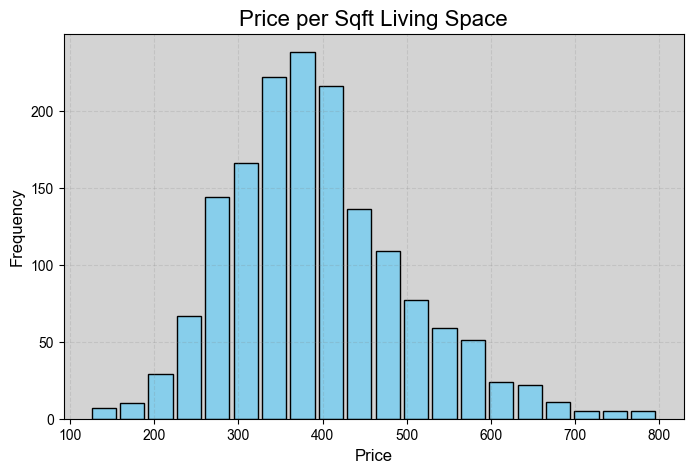

In [23]:
plt.hist(df_central['price_per_sqft_living'], bins=20, edgecolor='black', color='skyblue', rwidth=0.85)
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
plt.title('Price per Sqft Living Space', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('figures/price_psqft_dist.png') 
plt.show()

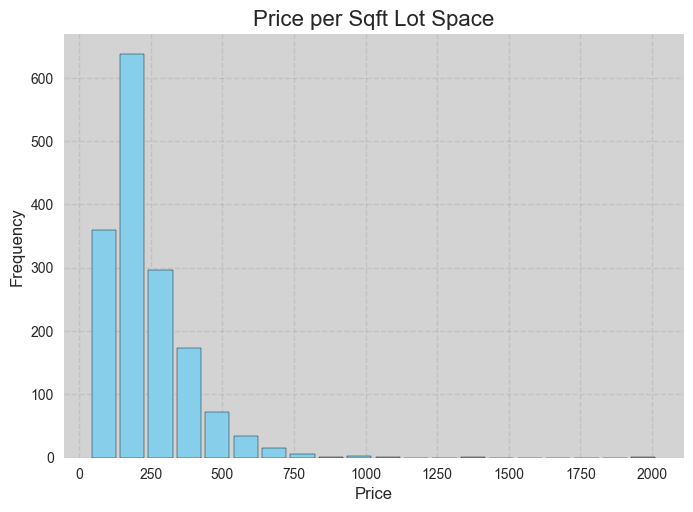

In [24]:
plt.hist(df_central['price_per_sqft_lot'], bins=20, edgecolor='black', color='skyblue', rwidth=0.85)
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
plt.title('Price per Sqft Lot Space', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

In [25]:
average_price_per_sqft = df_central.groupby('date')['price_per_sqft_living'].mean().reset_index()
average_price_per_sqft.columns

Index(['date', 'price_per_sqft_living'], dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


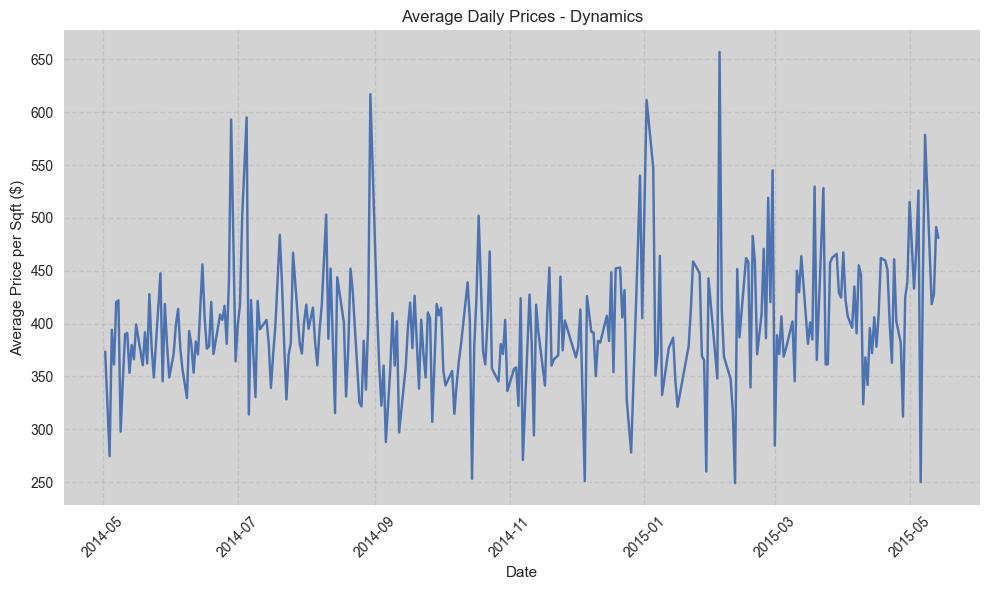

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.gca().set_facecolor('lightgray')

ax.plot(average_price_per_sqft['date'], average_price_per_sqft['price_per_sqft_living'])


sns.set_palette("viridis")

plt.grid(True, linestyle='--', alpha=0.2, color='gray')
ax.set_xlabel('Date')
ax.set_ylabel('Average Price per Sqft ($)')
ax.set_title('Average Daily Prices - Dynamics')
ax.legend()


plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('figures/price_dynamics.png') 
plt.show()

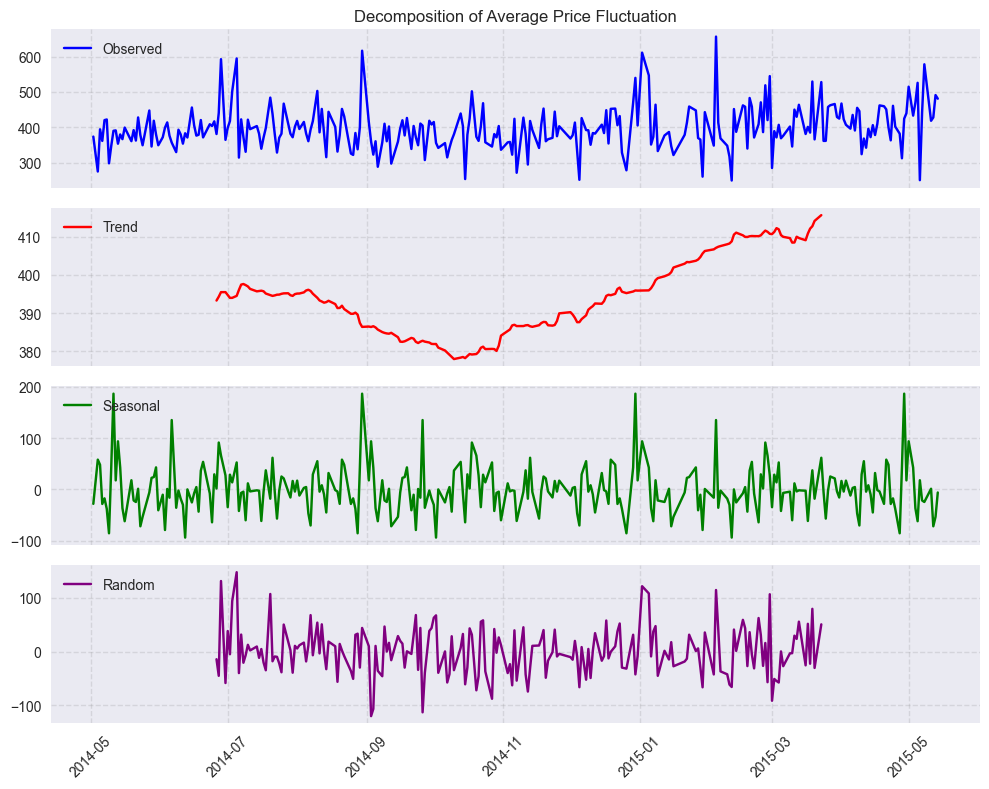

In [27]:
# Decomposition of price flactuations in trend, seasonal, and random components
from statsmodels.tsa.seasonal import seasonal_decompose
average_price_per_sqft.set_index('date', inplace=True)

result = seasonal_decompose(average_price_per_sqft['price_per_sqft_living'], model='additive', period=90)

fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)


sns.set_palette("viridis")
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
axes[0].set_title('Decomposition of Average Price Fluctuation')
axes[0].plot(result.observed, label='Observed', color='blue')
axes[0].legend(loc='upper left')
axes[0].grid(True, linestyle='--', alpha=0.2, color='gray')

axes[1].plot(result.trend, label='Trend', color='red')
axes[1].legend(loc='upper left')
axes[1].grid(True, linestyle='--', alpha=0.2, color='gray')

axes[2].plot(result.seasonal, label='Seasonal', color='green')
axes[2].legend(loc='upper left')
axes[2].grid(True, linestyle='--', alpha=0.2, color='gray')

axes[3].plot(result.resid, label='Random', color='purple')
axes[3].legend(loc='upper left')
axes[3].grid(True, linestyle='--', alpha=0.2, color='gray')


plt.xticks(rotation=45)
plt.savefig('figures/price_decomposition.png') 
plt.tight_layout()
plt.show()

In [28]:
# Calculate montly sales
df_central['year'] = df_central['date'].dt.year
df_central['month'] = df_central['date'].dt.month
monthly_sales = df_central.groupby(['year', 'month']).size().reset_index(name='soldhouses')
last_index = len(monthly_sales) - 1
monthly_sales.drop(last_index, inplace=True)
monthly_sales

,year,month,soldhouses
0,2014,5,153
1,2014,6,174
2,2014,7,175
3,2014,8,117
4,2014,9,136
5,2014,10,166
6,2014,11,115
7,2014,12,111
8,2015,1,65
9,2015,2,69


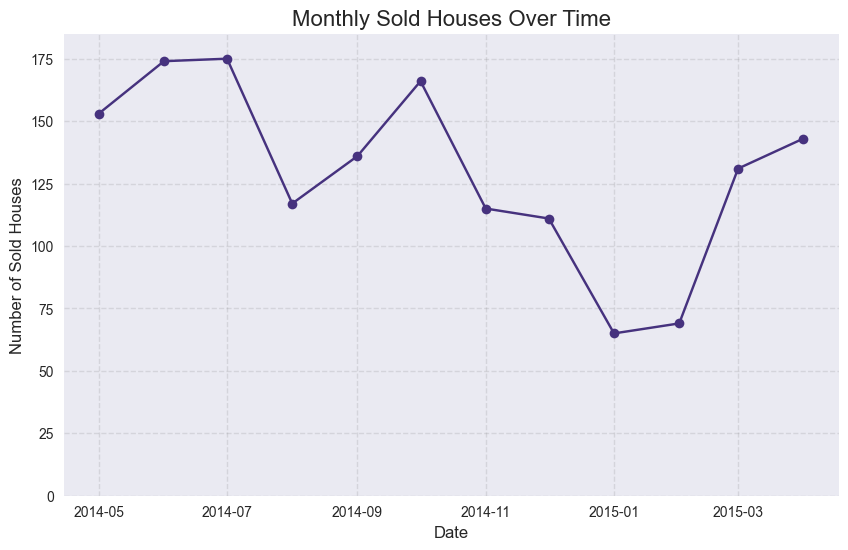

In [29]:
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))


plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Date'], monthly_sales['soldhouses'], marker='o', linestyle='-')
plt.ylim(0, monthly_sales['soldhouses'].max() + 10)
plt.title('Monthly Sold Houses Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sold Houses', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
plt.xticks(rotation=0)


plt.savefig('figures/monthly_sales.png')


plt.show()

In [30]:
# Create new variable total_sqft_sold
monthly_sqft_sold = df_central.groupby(['year', 'month'])['sqft_living'].sum().reset_index(name='total_sqft_sold')
monthly_sqft_sold.drop(last_index, inplace=True)
monthly_sqft_sold

,year,month,total_sqft_sold
0,2014,5,304620.000
1,2014,6,325409.000
2,2014,7,355270.000
3,2014,8,216194.000
4,2014,9,264610.000
5,2014,10,326341.000
6,2014,11,230402.000
7,2014,12,220820.000
8,2015,1,128331.000
9,2015,2,122866.000


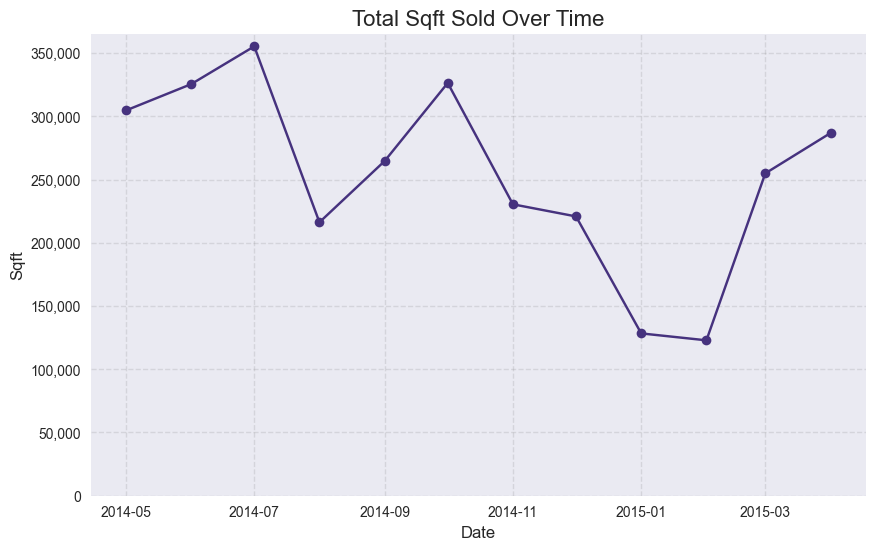

In [31]:
from matplotlib.ticker import FuncFormatter 
monthly_sqft_sold['Date'] = pd.to_datetime(monthly_sqft_sold[['year', 'month']].assign(day=1))

def format_with_commas(value, pos):
    return '{:,.0f}'.format(value)


plt.figure(figsize=(10, 6))
plt.plot(monthly_sqft_sold['Date'], monthly_sqft_sold['total_sqft_sold'], marker='o', linestyle='-')
plt.ylim(0, monthly_sqft_sold['total_sqft_sold'].max() + 10000)
plt.title('Total Sqft Sold Over Time', fontsize=16)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sqft', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
plt.xticks(rotation=0)


plt.savefig('figures/total_sqft_sold.png')


plt.show()

In [32]:
sqft_price_zip_year = df_central.groupby(['zipcode', 'year'])['price_per_sqft_living'].mean().reset_index(name='sqft_price_by_zip_year')
sqft_price_zip_year

,zipcode,year,sqft_price_by_zip_year
0,98102,2014,420.818
1,98102,2015,430.815
2,98103,2014,357.650
3,98103,2015,399.335
4,98105,2014,397.682
5,98105,2015,420.389
6,98109,2014,434.570
7,98109,2015,429.133
8,98112,2014,428.395
9,98112,2015,464.703


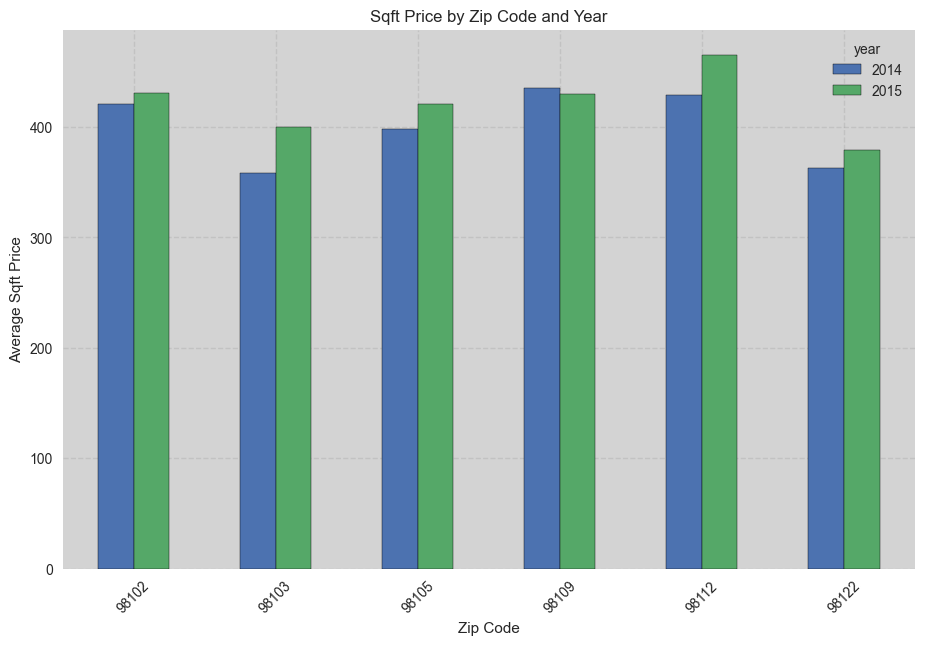

In [33]:
plt.style.use('seaborn')
p_sqft_price_zip_year = sqft_price_zip_year.pivot(index='zipcode', columns='year', values='sqft_price_by_zip_year')


ax = p_sqft_price_zip_year.plot(kind='bar', figsize=(11, 7), edgecolor='black')
bar_width = 0.25

plt.gca().set_facecolor('lightgray')

plt.grid(True, linestyle='--', alpha=0.2, color='gray')
plt.title('Sqft Price by Zip Code and Year')
plt.xlabel('Zip Code')
plt.ylabel('Average Sqft Price')
plt.xticks(rotation=45)


plt.savefig('figures/sqft_price_zip_year.png')
plt.show()

In [34]:
df_central.columns

Index(['date', 'price', 'house_id', 'id', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'price_per_sqft_living', 'price_per_sqft_lot', 'year', 'month'],
      dtype='object')

In [35]:
# group by condition and grade and for each pair calculate average per sqft price
sqft_price_cond_grade = df_central.groupby(['condition', 'grade'])['price_per_sqft_living'].mean().reset_index(name='sqft_price_by_cond')
sqft_price_cond_grade

,condition,grade,sqft_price_by_cond
0,1,6,319.000
1,1,7,256.333
2,2,5,404.000
3,2,6,543.500
4,2,7,340.000
5,2,10,483.000
6,3,5,333.000
7,3,6,423.000
8,3,7,384.765
9,3,8,368.367


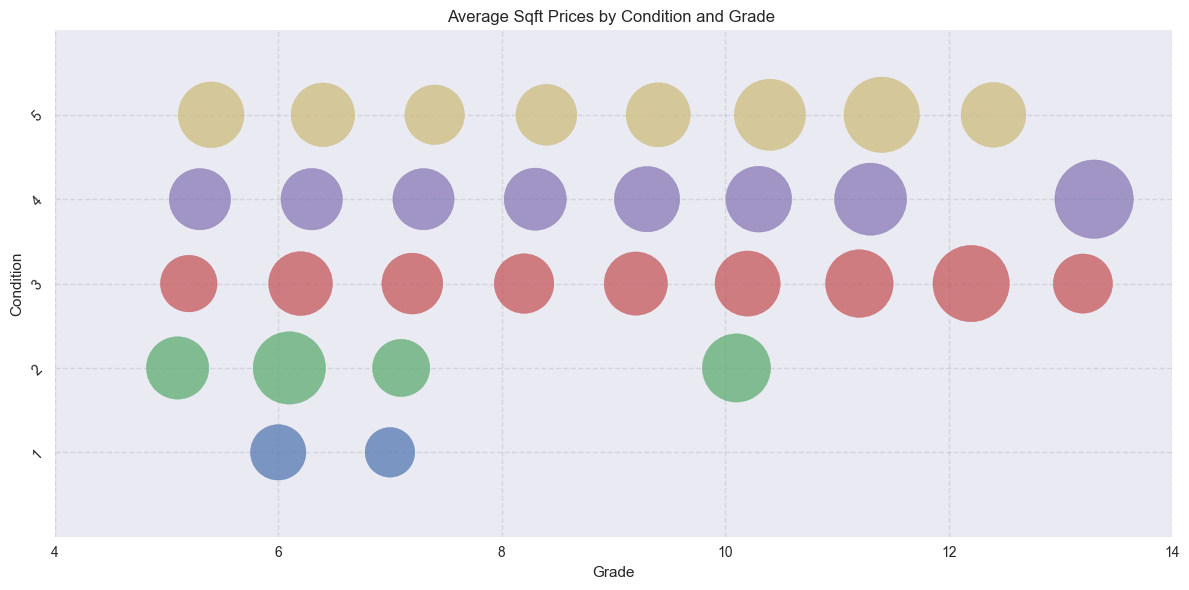

In [36]:
color_palette = sns.color_palette("colorblind")
plt.figure(figsize=(12, 6))
ax = plt.gca()

conditions = sqft_price_cond_grade['condition'].unique()

for i, cond in enumerate(conditions):
    cond_data = sqft_price_cond_grade[sqft_price_cond_grade['condition'] == cond]
    cond_data = cond_data.sort_values(by='sqft_price_by_cond', ascending=False)

    
    x_coords = cond_data['grade'] + 0.1 * i

    ax.scatter(x_coords, [i] * len(cond_data),
               s=cond_data['sqft_price_by_cond'] * 5,
               label=cond, alpha=0.7)

plt.title('Average Sqft Prices by Condition and Grade ')
plt.ylabel('Condition')
plt.xlabel('Grade')

yticks_int = range(len(conditions))
plt.yticks(yticks_int, conditions, rotation=45)
plt.grid(True, linestyle='--', alpha=0.2, color='gray')

plt.xlim(sqft_price_cond_grade['grade'].min() - 1, sqft_price_cond_grade['grade'].max() + 1)
plt.ylim(-1, len(conditions))

plt.grid(True)
plt.tight_layout()
plt.savefig('figures/price_cond_grade.png', dpi=300, bbox_inches='tight')
plt.show()


In [37]:
df_merged.columns

Index(['date', 'price', 'house_id', 'id', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [38]:
zipcodes_all = df_merged['zipcode'].unique().tolist()
print(len(zipcodes_all))

70


In [39]:
# load shape file for USA zipcode areas
shapefile_path = '/Users/bootcamp/Documents/Bootcamp/IDE_project/data/tl_2019_us_zcta510/tl_2019_us_zcta510.shp'  
gdf = gpd.read_file(shapefile_path)
gdf.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63484186,157689,+41.3183010,-083.6174935,"POLYGON ((-83.70873 41.32733, -83.70815 41.327..."
1,43452,43452,B5,G6350,S,121522304,13721730,+41.5157923,-082.9809454,"POLYGON ((-83.08698 41.53780, -83.08256 41.537..."
2,43456,43456,B5,G6350,S,9320975,1003775,+41.6318300,-082.8393923,"MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ..."
3,43457,43457,B5,G6350,S,48004681,0,+41.2673301,-083.4274872,"POLYGON ((-83.49650 41.25371, -83.48382 41.253..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.22229 41.53102, -83.22228 41.532..."


In [40]:
gdf.columns

Index(['ZCTA5CE10', 'GEOID10', 'CLASSFP10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10',
       'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'geometry'],
      dtype='object')

In [41]:
# filter through those areas that we have in df_merged dataset
zip_codes = zipcodes_all
filtered_gdf = gdf[gdf['GEOID10'].astype(int).isin(zip_codes)]
filtered_gdf.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
17008,98014,98014,B5,G6350,S,117330511,4642171,+47.6619712,-121.8919654,"POLYGON ((-122.00562 47.70899, -122.00439 47.7..."
17009,98019,98019,B5,G6350,S,198160630,2138510,+47.7343332,-121.8553066,"POLYGON ((-122.02800 47.73249, -122.02780 47.7..."
17351,98022,98022,B5,G6350,S,1050783148,7196209,+47.2160682,-122.1139056,"POLYGON ((-122.11589 47.21625, -122.11580 47.2..."
17352,98023,98023,B5,G6350,S,26760247,3619040,+47.3114910,-122.3628100,"MULTIPOLYGON (((-122.34200 47.32465, -122.3419..."
17353,98024,98024,B5,G6350,S,61952204,1346247,+47.5734245,-121.8991824,"POLYGON ((-121.97348 47.58392, -121.97347 47.5..."


In [42]:
# we have shape information for all zip codes in df_merged dataset
print(len(filtered_gdf))

70


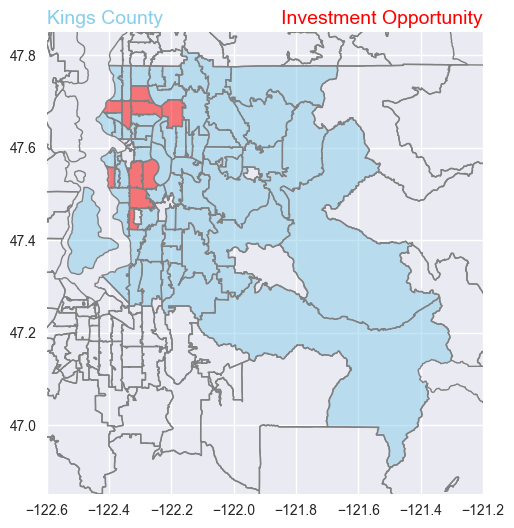

In [52]:
highlight_zip_codes = ['98148', '98115', '98033', '98125', '98117', '98103', '98108', '98136', '98118', '98168']


highlighted_gdf = filtered_gdf[filtered_gdf['GEOID10'].isin(highlight_zip_codes)]


fig, ax = plt.subplots(figsize=(9, 6))
gdf.boundary.plot(ax=ax, linewidth=1, color='gray') 
filtered_gdf[~filtered_gdf['GEOID10'].isin(highlight_zip_codes)].plot(ax=ax, color='skyblue', alpha=0.5)
highlighted_gdf.plot(ax=ax, color='red', alpha=0.5)

plt.xlim(-122.6, -121.2)
plt.ylim(46.85, 47.85)
plt.title('Kings County', color='skyblue', loc='left', fontsize=14)
plt.title('Investment Opportunity', color='red', fontsize=14, loc='right')

plt.savefig('figures/kings_county_inv_opp.png', dpi=300, bbox_inches='tight')
plt.show()

In [46]:
# average sqft price for df_merged
df_merged['price_sqft_living'] = df_merged['price'] // df_merged['sqft_living']
df_merged['year'] = df_merged['date'].dt.year
df_merged.columns

Index(['date', 'price', 'house_id', 'id', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'price_sqft_living', 'year'],
      dtype='object')

In [47]:
sqft_price_zip_year_merged = df_merged.groupby(['zipcode', 'year'])['price_sqft_living'].mean().reset_index(name='sqft_price_by_zip_year')
sqft_price_zip_year_merged

,zipcode,year,sqft_price_by_zip_year
0,98001,2014,148.714
1,98001,2015,155.397
2,98002,2014,148.523
3,98002,2015,154.970
4,98003,2014,155.087
...,...,...,...
135,98188,2015,173.679
136,98198,2014,173.863
137,98198,2015,185.469
138,98199,2014,372.617


In [48]:
pivoted = sqft_price_zip_year_merged.pivot(index='zipcode', columns='year', values='sqft_price_by_zip_year')
pivoted['growth_rate'] = ((pivoted[2015] - pivoted[2014]) / pivoted[2014]) * 100

print(pivoted)

year       2014    2015  growth_rate
zipcode                             
98001   148.714 155.397        4.493
98002   148.523 154.970        4.341
98003   155.087 159.562        2.886
98004   460.086 504.561        9.667
98005   308.992 327.420        5.964
...         ...     ...          ...
98177   287.050 305.784        6.526
98178   189.330 187.182       -1.134
98188   165.253 173.679        5.099
98198   173.863 185.469        6.676
98199   372.617 383.583        2.943

[70 rows x 3 columns]


In [49]:
top_10_growth = pivoted.sort_values(by='growth_rate', ascending=False).head(10)
top_10_growth

year,2014,2015,growth_rate
zipcode,,,
98148,175.256,207.111,18.176
98115,337.461,388.263,15.054
98033,326.887,375.886,14.990
98125,270.559,307.162,13.528
98117,351.066,393.293,12.028
98103,357.650,399.335,11.655
98108,217.813,242.043,11.124
98136,324.680,358.532,10.426
98118,252.065,277.970,10.277


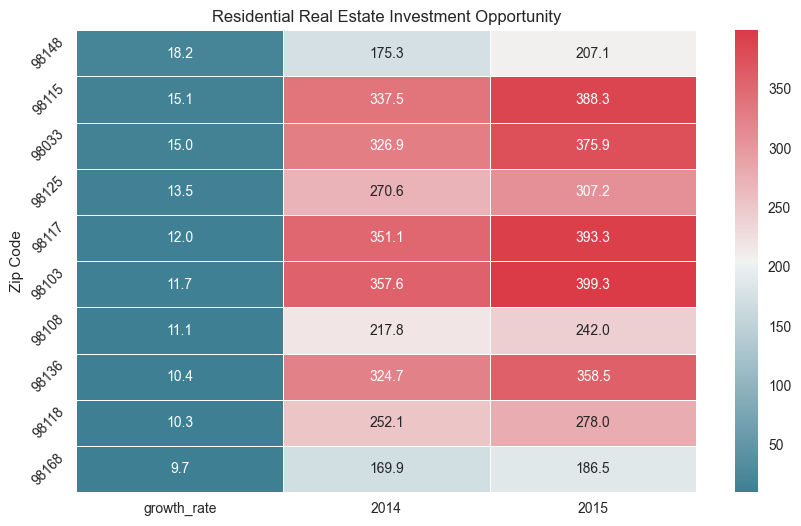

In [50]:
data = {
    'zipcode': [98148, 98115, 98033, 98125, 98117, 98103, 98108, 98136, 98118, 98168],
    '2014': [175.256, 337.461, 326.887, 270.559, 351.066, 357.650, 217.813, 324.680, 252.065, 169.941],
    '2015': [207.111, 388.263, 375.886, 307.162, 393.293, 399.335, 242.043, 358.532, 277.970, 186.457],
    'growth_rate': [18.176, 15.054, 14.990, 13.528, 12.028, 11.655, 11.124, 10.426, 10.277, 9.718]
}

df = pd.DataFrame(data)
df.set_index('zipcode', inplace=True)


cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap_colorblind = sns.color_palette("colorblind", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(df[['growth_rate', '2014', '2015']], annot=True, cmap=cmap, fmt=".1f", linewidths=0.5)
plt.title('Residential Real Estate Investment Opportunity')
plt.ylabel('Zip Code')
plt.yticks(rotation=45)  
plt.savefig('figures/invest_opp.png')
plt.show()